In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch 
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import sklearn as sk 
from keras.models import Model, Sequential
from IPython import display
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myratings/ratingsT.csv
/kaggle/input/book-recommendation-dataset/Ratings.csv
/kaggle/input/book-recommendation-dataset/Users.csv
/kaggle/input/book-recommendation-dataset/Books.csv


In [97]:
books = pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv")
ratings = pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")
users = pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [153]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [98]:
ratings_portion = ratings.head(150000)
ratings_portion.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [100]:
users_old_Id = set(ratings_portion["User-ID"])
books_ISBN = set(ratings_portion["ISBN"])

u = [i for i in range(1,len(users_old_Id)+1)]
b = [i for i in range(1,len(books_ISBN)+1)]

users_new_id = dict(zip(users_old_Id,u))
books_new_id = dict(zip(books_ISBN,b))

In [101]:
ratings_list = ratings.values.tolist()
ratings_portion_list = ratings_portion.values.tolist()

In [102]:
for i in ratings_list :
    if i[0] in users_new_id and i[1] in books_new_id :
        ratings_portion_list.append(i)

In [103]:
print(len(users_new_id))
print(len(books_new_id))
print(len(ratings_portion_list))

13696
87074
300007


In [104]:
for i in range(len(ratings_portion_list)):
    ratings_portion_list[i][0] = users_new_id[ratings_portion_list[i][0]] 
    ratings_portion_list[i][1] = books_new_id[ratings_portion_list[i][1]] 

In [105]:
ratings_portion_df = pd.DataFrame(ratings_portion_list)
ratings_portion_df.head()

,0,1,2
0,5739,7479,0
1,5740,5319,5
2,5741,34383,0
3,5743,56617,3
4,5743,6884,6


In [106]:
train, test = train_test_split(ratings_portion_df, test_size=0.1)

In [107]:
user_input_tensor = keras.layers.Input(shape=[1],name='user-input')
user_embedding = keras.layers.Embedding(len(users_new_id)+1, 10, 
                    name='user-embedding')(user_input_tensor)
user_vector = keras.layers.Flatten(name='user-flatten')(user_embedding) 

In [108]:
book_input_tensor = keras.layers.Input(shape=[1],name='book-input')
book_embedding = keras.layers.Embedding(len(books_new_id)+1, 10, 
                    name='book-embedding')(book_input_tensor)
book_vector = keras.layers.Flatten(name='book-flatten')(book_embedding) 

In [109]:
print(book_vector.shape)
print(user_vector.shape)

(None, 10)
(None, 10)


In [117]:
d = keras.layers.Dot(1,10)([book_vector, user_vector])
dense_1 = keras.layers.Dense(64, name='dense_1', activation='relu')(d)
dense_2= keras.layers.Dense(32, name= 'dense_2', activation='relu')(dense_1)
dense_3 = keras.layers.Dense(16, name='dense_3', activation='relu')(dense_2)
output_layer = keras.layers.Dense(1,name='output_layer', activation='relu')(dense_3)
My_model = Model([user_input_tensor, book_input_tensor], output_layer)

In [118]:
My_model.compile(loss='mean_absolute_error', optimizer='adam')

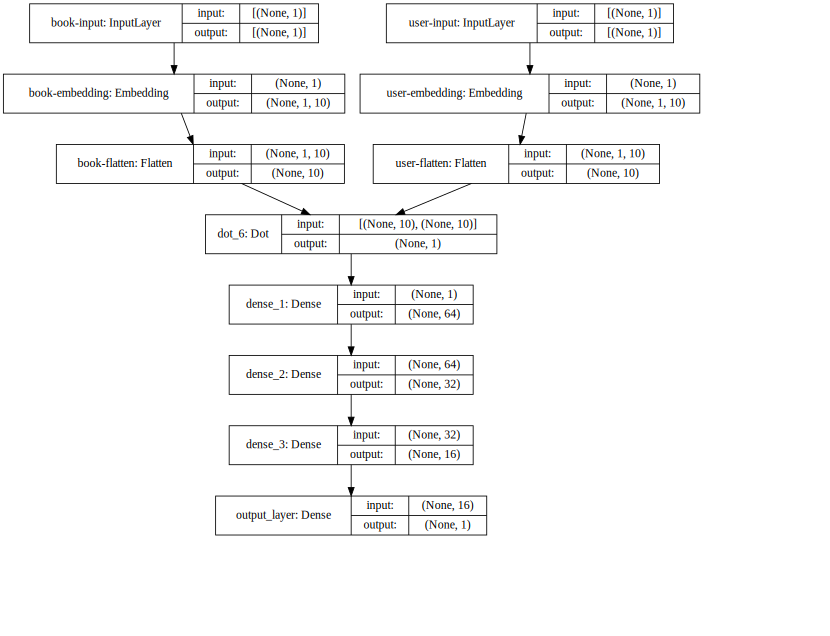

In [122]:
display.SVG(tf.keras.utils.model_to_dot(My_model, show_shapes=True, 
                                dpi=61).create(prog='dot', format='svg'))

In [123]:
My_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
book-input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user-input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
book-embedding (Embedding)      (None, 1, 10)        870750      book-input[0][0]                 
__________________________________________________________________________________________________
user-embedding (Embedding)      (None, 1, 10)        136970      user-input[0][0]                 
____________________________________________________________________________________________

In [124]:
tf.config.run_functions_eagerly(False)
fitModel = My_model.fit([train[0], train[1]], train[2], epochs=15)

Epoch 1/15
8438/8438 [==============================] - 88s 10ms/step - loss: 0.5948
Epoch 2/15
8438/8438 [==============================] - 86s 10ms/step - loss: 0.5433
Epoch 3/15
8438/8438 [==============================] - 85s 10ms/step - loss: 0.5235
Epoch 4/15
8438/8438 [==============================] - 84s 10ms/step - loss: 0.5084
Epoch 5/15
8438/8438 [==============================] - 85s 10ms/step - loss: 0.4990
Epoch 6/15
8438/8438 [==============================] - 86s 10ms/step - loss: 0.5052
Epoch 7/15
8438/8438 [==============================] - 88s 10ms/step - loss: 0.4992
Epoch 8/15
8438/8438 [==============================] - 88s 10ms/step - loss: 0.4842
Epoch 9/15
8438/8438 [==============================] - 89s 11ms/step - loss: 0.4757
Epoch 10/15
8438/8438 [==============================] - 92s 11ms/step - loss: 0.4760
Epoch 11/15
8438/8438 [==============================] - 88s 10ms/step - loss: 0.4731
Epoch 12/15
8438/8438 [==============================] - 88s 10

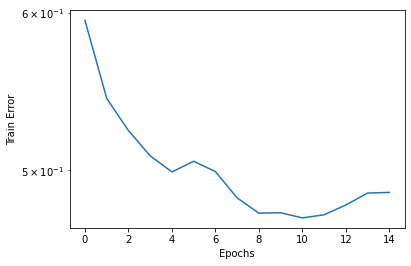

In [125]:
pd.Series(fitModel.history['loss']).plot(logy=True)
plt.xlabel("Epochs")
plt.ylabel("Train Error")
plt.show()

In [126]:
predicted = My_model.predict([test[0], test[1]])
sk.metrics.mean_absolute_error(test[2], predicted)

0.9803205194252658

In [ ]:
"""
earlystopping = keras.callbacks.EarlyStopping(monitor="val_loss",mode ="min",patience = 10)
temp_model.compile(loss='mean_absolute_error', optimizer='adam', 
                   metrics=['mean_absolute_error'])
fitModel = temp_model.fit(X_train, y_train, epochs=95, batch_size=450, 
                validation_data=(X_val, y_val), verbose=1, callbacks =[earlystopping])
results = temp_model.evaluate(X_test, y_test)"""